In [1]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import re
import string
import os
import numpy as np
import codecs
import io
from scipy.spatial import distance
from scipy.spatial.distance import cosine
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Glove Model
glove_input_file = 'glove.6B/glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

filename = 'glove.6B.300d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.6713277101516724)]


In [3]:
# Names from Supplemental Materials of the Paper
# Semantics derived automatically from language corpora contain human-like biases
# Authors: Aylin Caliskan,* Joanna J. Bryson,* Arvind Narayanan*
# https://science.sciencemag.org/content/356/6334/183
# Removed 'Boobie-Sue' because name not in models

european_american_names = ['Adam', 'Harry', 'Josh', 'Roger', 'Alan', 
                           'Frank', 'Justin', 'Ryan', 'Andrew', 'Jack', 
                           'Matthew', 'Stephen', 'Brad', 'Greg', 'Paul', 
                           'Jonathan', 'Peter', 'Amanda', 'Courtney', 'Heather', 
                           'Melanie', 'Katie', 'Betsy', 'Kristin', 'Nancy', 
                           'Stephanie', 'Ellen', 'Lauren', 
                           'Colleen', 'Emily', 'Megan', 'Rachel']

african_american_names = ['Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome',
                          'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel', 
                          'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence',
                          'Tyrone', 'Lavon', 'Marcellus', 'Wardell', 'Nichelle', 
                          'Shereen', 'Ebony', 'Latisha', 'Shaniqua', 'Jasmine', 
                          'Tanisha', 'Tia', 'Lakisha', 'Latoya','Yolanda', 
                          'Malika', 'Yvette']


male_european_american_names = ['Adam', 'Harry', 'Josh', 'Roger', 'Alan', 
                                'Frank', 'Justin', 'Ryan', 'Andrew', 'Jack', 
                                'Matthew', 'Stephen', 'Brad', 'Greg', 'Paul', 
                                'Jonathan', 'Peter']

female_european_american_names = ['Amanda', 'Courtney', 'Heather', 'Melanie', 'Katie', 
                                  'Betsy', 'Kristin', 'Nancy', 'Stephanie', 'Ellen', 
                                  'Lauren', 'Colleen', 'Emily', 'Megan', 'Rachel']

male_african_american_names = ['Alonzo', 'Jamel', 'Theo', 'Alphonse', 'Jerome', 
                               'Leroy', 'Torrance', 'Darnell', 'Lamar', 'Lionel', 
                               'Tyree', 'Deion', 'Lamont', 'Malik', 'Terrence', 
                                'Tyrone', 'Lavon', 'Marcellus', 'Wardell']

female_african_american_names = ['Nichelle', 'Shereen', 'Ebony', 'Latisha', 'Shaniqua', 
                                 'Jasmine', 'Tanisha', 'Tia', 'Lakisha', 'Latoya', 
                                 'Yolanda', 'Malika', 'Yvette']

female_names =  female_african_american_names + female_european_american_names

male_names = male_african_american_names + male_european_american_names


In [4]:
## write text of resumes for each name:

def write_cs_resume_string(name, location="Ohio"):
    """
    Write a generic CS resume with a specfic name, location, volunteer experiences, and one unrelated work 
    experience that is a strong he or she occupation in vector space as defined by
    'Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings' 
    https://arxiv.org/pdf/1607.06520.pdf 
    """
    resume_str = ""

    education = """University of {} | Bachelor of Science in Computer Science | 2013 - 2017
    Coursework: Analysis I and II; Introduction to Programming; Concepts of Mathematics; Principles of Imperative Programming, Great Theoretical Ideas in Computer Science""".format(location.split(",")[0])
    
    cs_job = """Crane & Jenkins, {} | Software Engineer | March 2018 - Present""".format(location)
    
    cs_bullets = ["Integrate code changes, test code changes, and document code changes",
    "Developed Perl and PHP scripts to translate data between applications",
    "Developed automation scripts to test storage appliances in Python",
    "Practice agile development methodologies and work with current networking technologies",  
    "Used Hadoop to build a scalable distributed data solution"]

    
    hair_job = "Top Salon, {} | Hair Stylist | 2013 - 2014".format(location)
    
    hair_bullets = ["Personally handled customer problems or concerns that ensured appropriate resolution steps were taken that maintained customer satisfaction",
                    "Built enduring client relationships and a thriving customer base of repeat and referral business.",
                    "Provided clientele with quality hair styling, coloring, and perming"]

    project = """Projects:
    
    News Delivery System (Spring 2014) - online information gathering/presentation system
    Integrated old code with new for web application delivering custom tailored web news. Coded in Java using Model-View-Controller architecture.
    
    Budgie (September 2016) - Lead Android Developer, Git Repo Manager
    App to manage and categorize expenses. Implements Microsoft’s Oxford Opitcal Character Recognition API. Pie charts show spending distribution. 
    """
    
    skills = """Skills: Java, Python, C, SML, HTML5, CSS, Django, Android, LATEX, Git, Data structures, Software design patterns """

    resume_str += name + " "
    resume_str += '{}@gmail.com | 656-789-6599 | www.linkedin.com/{} | github.com/{}123'.format(name.lower(), name.lower(), name.lower())
    resume_str += " Education: "
    resume_str += education + " "
    resume_str += "Work Experience: "
    resume_str += cs_job + " "
    
    for bullet in cs_bullets:
        resume_str += bullet + " "
        
    resume_str += hair_job
    
    for bullet in hair_bullets:
        resume_str += bullet + " "  
    
    resume_str += project + " "
    
    resume_str += skills + " "
    
    return resume_str

In [5]:
write_cs_resume_string(african_american_names[0])

'Alonzo alonzo@gmail.com | 656-789-6599 | www.linkedin.com/alonzo | github.com/alonzo123 Education: University of Ohio | Bachelor of Science in Computer Science | 2013 - 2017\n    Coursework: Analysis I and II; Introduction to Programming; Concepts of Mathematics; Principles of Imperative Programming, Great Theoretical Ideas in Computer Science Work Experience: Crane & Jenkins, Ohio | Software Engineer | March 2018 - Present Integrate code changes, test code changes, and document code changes Developed Perl and PHP scripts to translate data between applications Developed automation scripts to test storage appliances in Python Practice agile development methodologies and work with current networking technologies Used Hadoop to build a scalable distributed data solution Top Salon, Ohio | Hair Stylist | 2013 - 2014Personally handled customer problems or concerns that ensured appropriate resolution steps were taken that maintained customer satisfaction Built enduring client relationships a

In [6]:
# google job posting: https://careers.google.com/jobs/results/6441926003982336-software-engineer/?src=Online%2FJob%20Board%2Fstackoverflow&utm_campaign=2019&utm_medium=jobposting&utm_source=stackoverflow

with open("google_software_engineer_posting.txt", 'r') as f:
    google_job = f.read()

google_job[0:1000]

'Software Engineer\nGoogle Sunnyvale, CA, USA + 4 more locations\n25 days ago\nApply\nIn school or graduated within last 9 months? We encourage you to apply to openings on the Student Jobs site\n\nNote: By applying to this position your application is automatically submitted to the following locations: San Francisco, CA, USA; Mountain View, CA, USA; San Bruno, CA, USA; Sunnyvale, CA, USA; Palo Alto, CA, USA\n\nQualifications\nMinimum qualifications:\n\nBS degree in Computer Science, similar technical field of study or equivalent practical experience.\nSoftware development experience in one or more general purpose programming languages.\nExperience working with two or more from the following: web application development, Unix/Linux environments, mobile application development, distributed and parallel systems, machine learning, information retrieval, natural language processing, networking, developing large software systems, and/or security software development.\nWorking proficiency and

In [7]:
stop_words =  set(stopwords.words('english'))
names = african_american_names + european_american_names

def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text)
    words = text.split()
    words3 = [word for word in words if len(word) > 2]
    wordsL = [word.lower() for word in words3]
    wordsG = [word for word in wordsL if word not in stop_words]
    return(wordsG)

def doc2vec(text, model, n=300, names=names):
    wordlist = words(text)
    for name in names:
        if name.lower() in wordlist:
            wordlist += name  # Glove model has tokens for captiolized names
    vector_sum = np.zeros(n)
    n_words = 0
    vocab = list(model.wv.vocab)
    for word in wordlist:
        if word in vocab:
            n_words += 1
            vector_sum += model[word]
    return np.divide(vector_sum, n_words) # returns centriod 

def average_centriod_names(resume_strings:list, model, n=300, names=names):
    centroids = [doc2vec(resume, model, n=300, names=names) for resume in resume_strings]
    return np.mean(np.array(centroids), axis=0)

def distances(model, posting=str, resumes_centroids=list, n=300, distance='euclidean'): 
    """
    Resume list of resume text strings.
    Text is taken directly from posting or resume.
    """
    distances = []
    posting_centroid = doc2vec(posting, model, n)
    for resume_centroid in resumes_centroids:
        if distance == 'euclidean':
            closeness = np.linalg.norm(posting_centroid-resume_centroid)
        elif distance == 'cosine':
            closeness = cosine(resume_centroid, posting_centroid)
        else:
            ValueError("Enter euclidean or cosine")
        distances.append(closeness)
    return distances

In [8]:
# create resumes strings

female_african_american_resume_strings = [write_cs_resume_string(name) for name in female_african_american_names]

male_african_american_resume_strings = [write_cs_resume_string(name) for name in male_african_american_names]

female_european_american_resume_strings = [write_cs_resume_string(name) for name in female_european_american_names]

male_european_american_resume_strings = [write_cs_resume_string(name) for name in male_european_american_names]

african_american_resume_strings = female_african_american_resume_strings + male_african_american_resume_strings

european_american_resume_strings = female_european_american_resume_strings + male_european_american_resume_strings

female_resume_strings = female_african_american_resume_strings + female_european_american_resume_strings

male_resume_strings = male_african_american_resume_strings + male_european_american_resume_strings

In [9]:
# find average centroid for each set of resumes and calculate distances

resumes_set_titles = ['Female African American', 'Male African American', 
                     'Female European American', 'Male European American',
                     'All African American', 'All European American',
                     'All Female', 'All Male']

resumes_sets = [female_african_american_resume_strings, male_african_american_resume_strings,
                female_european_american_resume_strings, male_european_american_resume_strings, 
                african_american_resume_strings, european_american_resume_strings,
                female_resume_strings, male_resume_strings]

glove_resume_sets_centroids = [average_centriod_names(resume_strings, glove_model) for resume_strings in resumes_sets]

glove_resumes_sets_euclidean_distances = distances(glove_model, posting=google_job, resumes_centroids=glove_resume_sets_centroids, distance='euclidean')

glove_resumes_sets_cosine_distances = distances(glove_model, posting=google_job, resumes_centroids=glove_resume_sets_centroids, distance='cosine')


In [10]:
glove_euclidean_distances = dict()

for n, c in zip(resumes_set_titles, glove_resumes_sets_euclidean_distances):
    glove_euclidean_distances[n] = c
    
for i in sorted(glove_euclidean_distances.items(), key = lambda kv:(kv[1], kv[0])):
    print("The euclidean distance of", i[0], "resumes to the job posting is ", i[1])

The euclidean distance of Male European American resumes to the job posting is  1.0926220169696208
The euclidean distance of All European American resumes to the job posting is  1.0983770489395506
The euclidean distance of All Male resumes to the job posting is  1.1055158793717879
The euclidean distance of Female European American resumes to the job posting is  1.1064668948630332
The euclidean distance of All Female resumes to the job posting is  1.1105680481865001
The euclidean distance of Female African American resumes to the job posting is  1.116902547103274
The euclidean distance of All African American resumes to the job posting is  1.1171543414834997
The euclidean distance of Male African American resumes to the job posting is  1.1185147165183427


In [11]:
glove_cosine_distances = dict()

for n, c in zip(resumes_set_titles, glove_resumes_sets_cosine_distances):
    glove_euclidean_distances[n] = c
    
for i in sorted(glove_euclidean_distances.items(), key = lambda kv:(kv[1], kv[0])):
    print("The cosine distance of", i[0], "resumes to the job posting is ", i[1])

The cosine distance of Male European American resumes to the job posting is  0.08020465439885416
The cosine distance of All European American resumes to the job posting is  0.08098174383432477
The cosine distance of All Male resumes to the job posting is  0.08189844646319411
The cosine distance of Female European American resumes to the job posting is  0.08215613964145507
The cosine distance of All Female resumes to the job posting is  0.08254444270455352
The cosine distance of Female African American resumes to the job posting is  0.08328236447005288
The cosine distance of All African American resumes to the job posting is  0.08339192281842867
The cosine distance of Male African American resumes to the job posting is  0.0836931202746386


In [12]:
# examine word counts

def word_count_dict(model, words):
    word_counts = dict() 
    for word in words:
        if word not in model.wv.vocab:
            word = word.lower()
            if word in model.wv.vocab:
                word_counts[word] = model.wv.vocab[word].count
            else:
                word_counts[word] = 0
        else:
            word_counts[word] = model.wv.vocab[word].count
    return word_counts

glove_name_counts = word_count_dict(glove_model, names)

In [13]:
glove_name_counts

{'alonzo': 374012,
 'jamel': 297609,
 'theo': 384401,
 'alphonse': 363587,
 'jerome': 390108,
 'leroy': 382590,
 'torrance': 373252,
 'darnell': 363798,
 'lamar': 385433,
 'lionel': 388612,
 'tyree': 339329,
 'deion': 372830,
 'lamont': 379177,
 'malik': 389603,
 'terrence': 376125,
 'tyrone': 382193,
 'lavon': 257858,
 'marcellus': 355502,
 'wardell': 344443,
 'nichelle': 239039,
 'shereen': 185280,
 'ebony': 364920,
 'latisha': 136968,
 'shaniqua': 69799,
 'jasmine': 375040,
 'tanisha': 246351,
 'tia': 362308,
 'lakisha': 165572,
 'latoya': 309172,
 'yolanda': 366146,
 'malika': 315243,
 'yvette': 356168,
 'adam': 396074,
 'harry': 396785,
 'josh': 392259,
 'roger': 396276,
 'alan': 396734,
 'frank': 397930,
 'justin': 393289,
 'ryan': 396488,
 'andrew': 397369,
 'jack': 397820,
 'matthew': 395230,
 'stephen': 397338,
 'brad': 393658,
 'greg': 395373,
 'paul': 399077,
 'jonathan': 395170,
 'peter': 398706,
 'amanda': 388658,
 'courtney': 385578,
 'heather': 387260,
 'melanie': 382685

In [15]:
np.min(list(glove_name_counts.values())), np.std(list(glove_name_counts.values()))

(69799, 67153.15559125302)

### Examining Glove Model Distances

In [16]:
glove_distances_df = pd.DataFrame()
glove_distances_df['Group'] = resumes_set_titles
glove_distances_df['Euclidean'] = glove_resumes_sets_euclidean_distances
glove_distances_df['Cosine'] = glove_resumes_sets_cosine_distances

glove_euclidean_mean, glove_euclidean_std = np.mean(glove_resumes_sets_euclidean_distances), np.std(glove_resumes_sets_euclidean_distances)

glove_euclidean_mean, glove_euclidean_std 


(1.108265186679451, 0.008783889172250977)

In [17]:
glove_cosine_mean, glove_cosine_std = np.mean(glove_resumes_sets_cosine_distances), np.std(glove_resumes_sets_cosine_distances)
glove_cosine_mean, glove_cosine_std

(0.08226910432568772, 0.0011434842007861515)

In [18]:
def stds_away(mean, std, value):
    return (value - mean)/std

glove_distances_df['Stds_Away_From_Euclidean_Mean'] = glove_distances_df.Euclidean.apply(lambda x : stds_away(glove_euclidean_mean, glove_euclidean_std, x))
glove_distances_df['Stds_Away_From_Cosine_Mean'] = glove_distances_df.Cosine.apply(lambda x : stds_away(glove_cosine_mean, glove_cosine_std, x))

glove_distances_df.sort_values('Euclidean')


,Group,Euclidean,Cosine,Stds_Away_From_Euclidean_Mean,Stds_Away_From_Cosine_Mean
3,Male European American,1.092622,0.080205,-1.780893,-1.805403
5,All European American,1.098377,0.080982,-1.125713,-1.125823
7,All Male,1.105516,0.081898,-0.312994,-0.324148
2,Female European American,1.106467,0.082156,-0.204726,-0.098790
6,All Female,1.110568,0.082544,0.262169,0.240789
0,Female African American,1.116903,0.083282,0.983318,0.886116
4,All African American,1.117154,0.083392,1.011984,0.981927
1,Male African American,1.118515,0.083693,1.166856,1.245331


In [19]:
distance_male_european_male_african_euclidean = abs(float(glove_distances_df[glove_distances_df.Group=='Male European American']['Stds_Away_From_Euclidean_Mean'])) + float(glove_distances_df[glove_distances_df.Group=='Male African American']['Stds_Away_From_Euclidean_Mean'])
print("When comparing Euclidean distances, the group of Male African American resumes is", distance_male_european_male_african_euclidean, "standord deviations away from the group of European American resumes.")

distance_male_european_male_african_cosine = abs(float(glove_distances_df[glove_distances_df.Group=='Male European American']['Stds_Away_From_Cosine_Mean'])) + float(glove_distances_df[glove_distances_df.Group=='Male African American']['Stds_Away_From_Cosine_Mean'])
print("When comparing Euclidean distances, the group of Male African American resumes is", distance_male_european_male_african_cosine, "standord deviations away from the group of European American resumes.")


When comparing Euclidean distances, the group of Male African American resumes is 2.947748889013652 standord deviations away from the group of European American resumes.
When comparing Euclidean distances, the group of Male African American resumes is 3.0507337778572734 standord deviations away from the group of European American resumes.


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

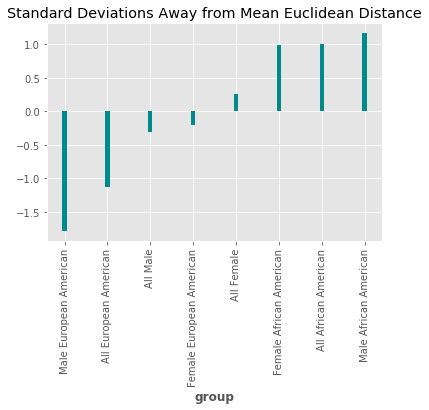

In [22]:
import matplotlib.pyplot as plt

glove_distances_df = glove_distances_df.sort_values('Euclidean')
plt.style.use('ggplot')
plt.bar(glove_distances_df['Group'], glove_distances_df['Stds_Away_From_Euclidean_Mean'], width=0.1, color = 'darkcyan')
plt.title("Standard Deviations Away from Mean Euclidean Distance")
plt.xlabel('group', fontweight='bold')
plt.xticks(rotation=90)

        

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

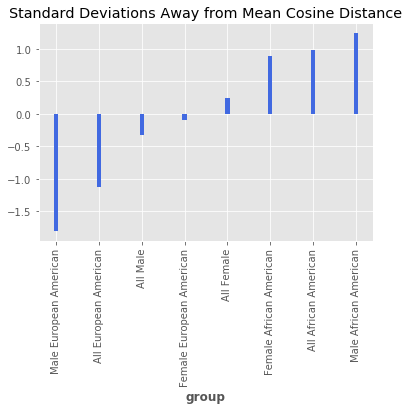

In [23]:
plt.style.use('ggplot')
plt.bar(glove_distances_df['Group'], glove_distances_df['Stds_Away_From_Cosine_Mean'], width=0.1, color = 'royalblue')
plt.title("Standard Deviations Away from Mean Cosine Distance")
plt.xlabel('group', fontweight='bold')
plt.xticks(rotation=90)
